In [3]:
# import yfinance as yf
import time
# import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
df = yf.download('BHARTIARTL.NS', start = '2020-01-01')
df


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS,BHARTIARTL.NS
Date,,,,,
2020-01-01,436.938934,443.879073,433.517054,439.589668,5154996
2020-01-02,438.770386,442.818785,437.131744,437.710074,4933053
2020-01-03,438.673981,442.626002,435.203941,439.252341,5154587
2020-01-06,433.420685,440.939154,428.601139,437.517274,7538915
2020-01-07,429.034882,438.866730,427.107075,435.685855,4353883
...,...,...,...,...,...
2025-02-04,1661.449951,1668.300049,1629.050049,1662.150024,6385876
2025-02-05,1660.449951,1675.199951,1649.099976,1670.000000,3920893


In [ ]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.columns = [col.split('_')[0] for col in df.columns]
df

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-14,1600.099976,1633.400024,1578.500000,1604.699951,7284572
2025-01-15,1607.449951,1613.849976,1593.000000,1608.050049,2960985
2025-01-16,1630.199951,1635.000000,1600.550049,1619.050049,5299325
2025-01-17,1627.500000,1639.000000,1623.000000,1630.099976,2678801
2025-01-20,1641.150024,1645.000000,1618.099976,1638.000000,3933044
2025-01-21,1626.150024,1656.699951,1620.300049,1654.000000,7958844
2025-01-22,1631.750000,1641.000000,1622.550049,1627.500000,3262136
2025-01-23,1636.000000,1645.400024,1617.199951,1624.500000,2457080
2025-01-24,1644.800049,1661.900024,1634.050049,1634.050049,3620058


In [4]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df = df.reset_index()['close']
df

0        436.938934
1        438.770386
2        438.673981
3        433.420685
4        429.034882
           ...     
1262    1661.449951
1263    1660.449951
1264    1619.750000
1265    1676.750000
1266    1693.050049
Name: close, Length: 1267, dtype: float64

In [5]:
df1 = pd.DataFrame(df).to_numpy()
actual_value =df1[-1][0]
actual_value

np.float64(1693.050048828125)

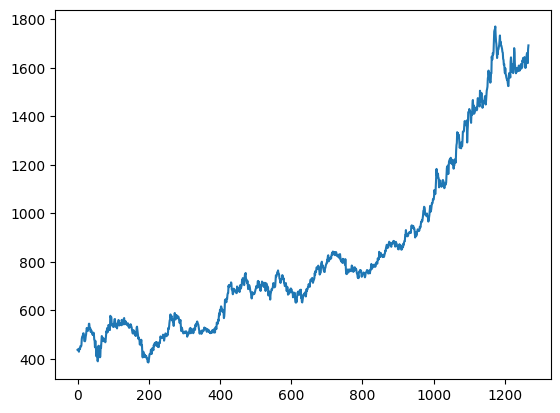

In [6]:
plt.plot(df)

In [7]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
scaler=MinMaxScaler (feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [8]:
df

array([[0.03766404],
       [0.03898507],
       [0.03891554],
       ...,
       [0.89083063],
       [0.93194497],
       [0.94370226]])

In [9]:
training_size=int(len(df)*0.8)
test_size=len (df)-training_size
train_data, test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [10]:
training_size, test_size

(1013, 254)

In [11]:
# creating 60(or whatever you decided) batches
import numpy
# convert an array of values into a dataset matrix
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [12]:
# reshape into X=t,t+1, t+2, t+3 and Y=t+4
time_step=60

X_train, y_train = create_dataset (train_data, time_step)
X_test, y_test = create_dataset (test_data, time_step)

In [13]:
X_train.shape

(952, 60)

In [13]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [ ]:
model=Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(512, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,986,881 (7.58 MB)

 Trainable params: 1,986,881 (7.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

In [16]:
from keras.models import load_model

In [ ]:
model.save('Airtel_Pred_model.h5')

In [19]:
model = load_model('Model/Airtel_Pred_model.h5')

In [20]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


In [21]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

694.2819068739482

In [22]:
math.sqrt(mean_squared_error(y_test, test_predict))

1534.6123925179363

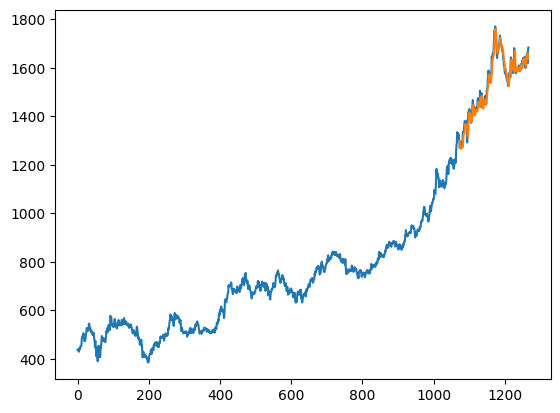

In [23]:
### Plotting
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot [look_back: len(train_predict) +look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()